### Задания на 1 балл
1. Вывести самого успешного игрока.
2. Вывести дату, где процент побед был максимальным среди игроков.
3. Добавьте в датафрейм информацию о дате рождения каждого игрока. Выведите средний возраст всех игроков
4. Добавьте в датафрейм информацию об уровне сложности боя, пусть
их будет 4 разных. Выясните, на каком уровне сложности бот
побеждал чаще всего
5. Добавьте столбцы, который высчитывает общую атаку всех юнитов
и общую защиту. Сделать это для обоих армий.
### Задания на 2 балла
Для всех заданий на 2 балла необходимо результирующий
DataFrame сохранить в отдельный csv файл.
1. Создайте сводную таблицу, которая показывает среднюю атаку и
защиту юнитов по типам юнитов (пехота, конница, стрелки).
2. Посчитайте сумму атакующих значений для всех юнитов,
участвующих в боях, и найдите среднее значение.
3. Используйте pandas для построения графика, отображающего атаку
и защиту юнитов (например, столбчатую диаграмму или иную
другую).
4. Найдите все битвы, в которых участвуют юниты, у которых атака по
коннице больше 4 и защита по коннице больше 3, и выведите список
этих битв.
### Задания на 3 балла
Для всех заданий на 3 балла необходимо результирующий
DataFrame сохранить в отдельный csv файл.
1. Создайте новую колонку, которая выражает отношение атаки к
защите для всех юнитов, и постройте график для анализа этого
отношения. Найдите юнита, у которого отношение атаки к защите
(рассчитанное ранее) ближе всего к 1, и выведите его
2. характеристики.
Найдите все битвы, в которых участвуют юниты, у которых атака по
коннице больше 4 и защита по коннице больше 3, и выведите список
3. этих битв. Для полученного датафрейма создайте столбчатую
диаграмму распределения исходов битв.
Рассчитайте эффективность каждого юнита как отношение его
суммарной атаки к суммарной защите в боях. Сохраните результат в
новом DataFrame и отсортируйте по убыванию эффективности.
Также, создайте новый DataFrame и выясните, в каком количестве
выигранных, проигранных боев участвовал каждый юнит, а также
боев, которые завершились в ничью. Объедините два полученных
DataFrame в один и высчитайте коэффициент «полезности» юнита,
как отношение его боевой эффективности к проценту побед.
4. Добавьте к исходного DataFrame столбец погоды. Пусть погода
бывает четырех видов – снег, дождь, туман и ясно. Снег –
уменьшает атаку юнитов пеших, дождь – всадников, туман –
лучников, ясно – не делает ничего. Конкретные характеристики по
каждому виду погоды укажите в отдельном csv файле. Посчитайте
суммарную атаку юнитов игрока и юнитов бота с учетом погоды.
Создайте новый датафрейм, в котором будет указана информация о
связи между исходами битв и погодой.

### Задача 1 уровень 2

In [11]:
import pandas as pd

path_to_file = 'data/unit_characteristics.csv'
df = pd.read_csv(path_to_file)

df["average_attack"] = df[["attack_infantry", "attack_cavalry", "attack_ranged"]].mean(axis=1)
df["average_defense"] = df[["defense_infantry", "defense_cavalry", "defense_ranged"]].mean(axis=1)

answer_table = df[["name", "average_attack", "average_defense"]]

answer_table.to_csv("custom_tasks_answers/task1.csv", index=False)

print("Готово")

Готово


### Задача 2 уровень 2

In [12]:
import pandas as pd

df = pd.read_csv("data/unit_characteristics.csv")

df["total_attack"] = df[["attack_infantry", "attack_cavalry", "attack_ranged"]].sum(axis=1)

total_attack_sum = df["total_attack"].sum()

total_attack_mean = df["total_attack"].mean()

result = pd.DataFrame({"total_attack_sum": [total_attack_sum], "total_attack_mean": [total_attack_mean]})
result.to_csv("custom_tasks_answers/task2.csv", index=False)

print("Суммарная атака:", total_attack_sum)
print("Средняя атака:", total_attack_mean)
print("Результаты сохранены в 'task2.csv'.")


Суммарная атака: 31
Средняя атака: 10.333333333333334
Результаты сохранены в 'task2.csv'.


### Задача 3 уровень 2

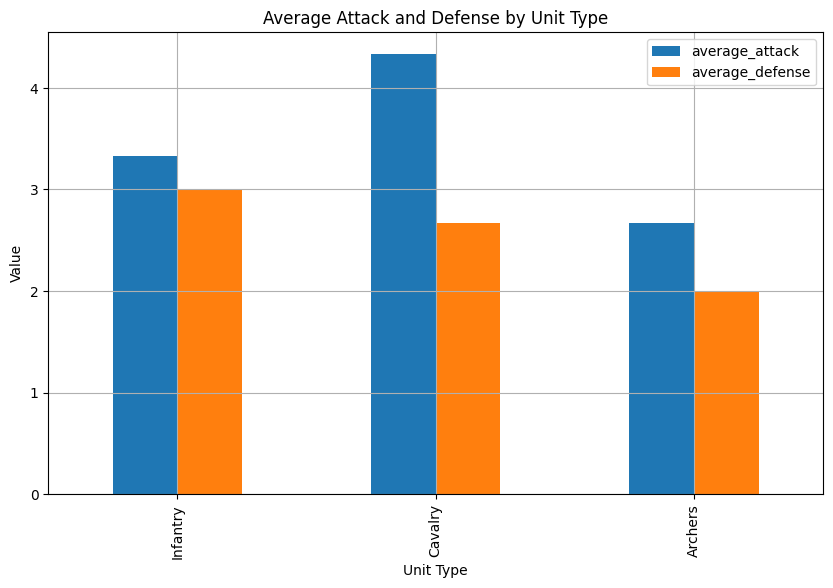

In [13]:
import pandas as pd

df = pd.read_csv("data/unit_characteristics.csv")

df["average_attack"] = df[["attack_infantry", "attack_cavalry", "attack_ranged"]].mean(axis=1)
df["average_defense"] = df[["defense_infantry", "defense_cavalry", "defense_ranged"]].mean(axis=1)

plot = df.plot(
    x="name",
    y=["average_attack", "average_defense"],
    kind="bar",
    figsize=(10, 6),
    title="Average Attack and Defense by Unit Type",
    ylabel="Value",
    xlabel="Unit Type",
    legend=True,
    grid=True
)

fig = plot.get_figure()
fig.savefig("attack_defense_chart_pandas.png")


### Задача 4 уровень 2

In [14]:

df = pd.read_csv("data/unit_characteristics.csv")

qualified_units = df[
    (df["attack_cavalry"] > 4) & (df["defense_cavalry"] > 3)
]["name"].tolist()

df2 = pd.read_csv("data/battle_results.csv")

filtered_battles = df2[
    df2["player_army"].str.contains('|'.join(qualified_units), case=False) |
    df2["bot_army"].str.contains('|'.join(qualified_units), case=False)
]

filtered_battles_list = filtered_battles[["id_player", "player_army", "bot_army", "battle_result", "date"]]
filtered_battles_list



,id_player,player_army,bot_army,battle_result,date
0,Player_12,"infantry, mounted archer, cavalry, archer, cav...","mounted archer, infantry, mounted archer, arch...",bot_win,2023-10-17
1,Player_21,"mounted archer, infantry, mounted archer, infa...","mounted archer, mounted archer, infantry, cava...",bot_win,2023-10-20
2,Player_2,"mounted archer, cavalry, infantry, archer, arc...","infantry, archer, mounted archer, cavalry, cav...",draw,2023-10-03
3,Player_8,"mounted archer, mounted archer, cavalry, arche...","archer, infantry, infantry, infantry, infantry...",bot_win,2023-10-23
4,Player_42,"archer, cavalry, infantry, archer, cavalry, ar...","cavalry, infantry, infantry, cavalry, mounted ...",bot_win,2023-10-08
...,...,...,...,...,...
49995,Player_42,"cavalry, mounted archer, mounted archer, infan...","infantry, archer, infantry, cavalry, cavalry, ...",draw,2023-10-09
49996,Player_14,"mounted archer, archer, infantry, cavalry, cav...","infantry, archer, cavalry, archer, mounted arc...",player_win,2023-10-12
49997,Player_20,"mounted archer, infantry, cavalry","cavalry, infantry, mounted archer, archer, cav...",draw,2023-10-07
49998,Player_35,"archer, cavalry, archer, cavalry, mounted arch...","mounted archer, cavalry, archer, archer, infan...",player_win,2023-10-20
